In [29]:
pip install ktrain

In [30]:
pip install tensorflow

In [31]:
import ktrain

In [32]:
from ktrain import vision as vis

In [33]:
import re

In [34]:
pattern = r'([^/]+)_\d+_\d+.jpg$'
p = re.compile(pattern)
r = p.search('267_132_00043.jpg')
print(r.group(1))

267


In [35]:
from google.colab import drive, files
from pathlib import Path
import sys
drive.mount('/content/drive', force_remount = True)
DATADIR = Path("/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2")
sys.path.append(str(DATADIR.parent))

Mounted at /content/drive


In [36]:
(train_data, test_data, preproc) = vis.images_from_fname("/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2", pattern=pattern, is_regression=True, random_state=42,color_mode='rgb',val_pct=0.15)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2/989_10_2.jpg.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:580: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting 

['label']
      label
656  1433.0
606  1307.0
323   897.0
827   991.0
367   931.0
['label']
      label
868  1170.0
439  1156.0
342   912.0
735  1638.0
784  1813.0
Found 770 validated image filenames.
Found 137 validated image filenames.


In [37]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [38]:
model= vis.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data, metrics=['mae'])

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
pretrained_resnet50 model created.


In [39]:
learner = ktrain.get_learner(model=model, train_data=train_data, val_data=test_data, batch_size=1)

In [40]:
learner.fit_onecycle(1e-3,12)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/12
770/770 [==============================] - 393s 506ms/step - loss: 1070515.0775 - mae: 903.5245 - val_loss: 163590.0469 - val_mae: 316.0303
Epoch 2/12
770/770 [==============================] - 383s 498ms/step - loss: 165494.3919 - mae: 316.0932 - val_loss: 90003.6250 - val_mae: 230.4850
Epoch 3/12
770/770 [==============================] - 377s 490ms/step - loss: 69089.7718 - mae: 198.3815 - val_loss: 48099.0117 - val_mae: 160.8915
Epoch 4/12
770/770 [==============================] - 382s 496ms/step - loss: 29785.6603 - mae: 123.4541 - val_loss: 29196.6523 - val_mae: 124.0116
Epoch 5/12
770/770 [==============================] - 379s 492ms/step - loss: 19440.7734 - mae: 98.7726 - val_loss: 23094.1445 - val_mae: 102.1078
Epoch 6/12
770/770 [==============================] - 374s 486ms/step - loss: 14411.9074 - mae: 79.4340 - val_loss: 18716.8203 - val_mae: 89.7497
Epoch 7/12
770/770 [============================

In [41]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [42]:
test_data.filenames

['1170_1039_44.jpg',
 '1156_632_00552.jpg',
 '912_655_00370.jpg',
 '1638_762_00169.jpg',
 '1813_787_00214.jpg',
 '1170_1039_6.jpg',
 '1223_941_00087.jpg',
 '855_653_00249.jpg',
 '1503_762_15.jpg',
 '1233_509_00565.jpg',
 '1231_749_00054.jpg',
 '1503_762_18.jpg',
 '241_170_00762.jpg',
 '1886_751_00102.jpg',
 '884_922_00291.jpg',
 '1311_569_00493.jpg',
 '2004_912_00067.jpg',
 '1152_814_00038.jpg',
 '1566_1009_00186.jpg',
 '1234_860_00094.jpg',
 '878_681_00340.jpg',
 '812_701_00343.jpg',
 '835_932_00271.jpg',
 '1170_768_00024.jpg',
 '1189_526_00497.jpg',
 '1237_594_00470.jpg',
 '918_867_00264.jpg',
 '1457_829_00180.jpg',
 '1444_837_00159.jpg',
 '882_624_00314.jpg',
 '1607_723_00125.jpg',
 '1258_578_00593.jpg',
 '813_884_00372.jpg',
 '1349_1218_00110.jpg',
 '915_764_00367.jpg',
 '1418_904_00138.jpg',
 '1563_1099_00182.jpg',
 '2003_914_00059.jpg',
 '908_719_00259.jpg',
 '1221_955_00078.jpg',
 '813_557_00435.jpg',
 '934_923_00354.jpg',
 '292_158_00756.jpg',
 '255_165_00037.jpg',
 '1697_725_0

In [43]:
len(test_data.filenames)

137

In [44]:
from sklearn.metrics import mean_absolute_error, r2_score

In [45]:
predicted1 = []
actualval1 = []

In [46]:
def show_prediction(fname):
    fname = str(DATADIR) + '/' + fname
    pred = round(predictor.predict_filename(fname)[0])
    predicted1.append(pred)
    actual = int(p.search(fname).group(1))
    actualval1.append(actual)
    mae = mean_absolute_error(actualval1,predicted1)
    r2 = r2_score(actualval1,predicted1)
    print("mae = %s | r2 = %s" % (mae,r2))
    vis.show_image(fname)
    print("Predicted Sweat rate = %s | Actual Sweat rate = %s" % (pred, actual))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


mae = 66.0 | r2 = nan
Predicted Sweat rate = 1236 | Actual Sweat rate = 1170
mae = 54.0 | r2 = -61.44897959183673
Predicted Sweat rate = 1114 | Actual Sweat rate = 1156
mae = 83.0 | r2 = 0.38237948945334777
Predicted Sweat rate = 771 | Actual Sweat rate = 912
mae = 89.25 | r2 = 0.8636215511622855
Predicted Sweat rate = 1746 | Actual Sweat rate = 1638
mae = 153.2 | r2 = 0.6330084333604084
Predicted Sweat rate = 1404 | Actual Sweat rate = 1813
mae = 128.83333333333334 | r2 = 0.6477221531174342
Predicted Sweat rate = 1163 | Actual Sweat rate = 1170
mae = 119.28571428571429 | r2 = 0.6450584296234427
Predicted Sweat rate = 1161 | Actual Sweat rate = 1223
mae = 104.875 | r2 = 0.7250644909742254
Predicted Sweat rate = 859 | Actual Sweat rate = 855
mae = 102.22222222222223 | r2 = 0.7373439706588429
Predicted Sweat rate = 1584 | Actual Sweat rate = 1503
mae = 108.5 | r2 = 0.7046194172490399
Predicted Sweat rate = 1068 | Actual Sweat rate = 1233
mae = 109.18181818181819 | r2 = 0.6886926396401871

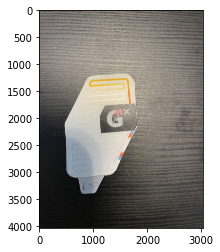

In [47]:
for i in range(len(test_data.filenames)):
  show_prediction(test_data.filenames[i])

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x=np.arange(1,126,1)
x

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125])

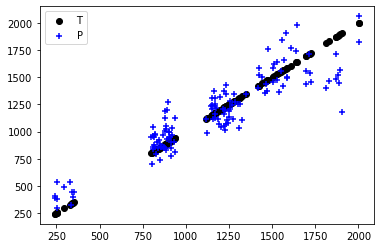

In [50]:
# Plot outputs
plt.scatter(actualval1, actualval1,  color='black')
plt.scatter(actualval1, predicted1, color='blue',marker="+")
plt.legend('TP')
plt.show()

In [69]:
pattern1 = r'\d+_([^/]+)_\d+.jpg$'
p = re.compile(pattern1)
r = p.search('267_132_00043.jpg')
print(r.group(1))

132


In [71]:
(train_data, test_data, preproc) = vis.images_from_fname("/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2", pattern=pattern1, is_regression=True, random_state=42,color_mode='rgb',val_pct=0.15)

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/Images_2/989_10_2.jpg.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:580: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting 

['label']
      label
656  1003.0
606   512.0
323   761.0
827    10.0
367   807.0
['label']
      label
868  1039.0
439   632.0
342   655.0
735   762.0
784   787.0
Found 770 validated image filenames.
Found 137 validated image filenames.


In [72]:
test_data.filenames[105]

'940_10_7.jpg'

In [73]:
test_data.filenames

['1170_1039_44.jpg',
 '1156_632_00552.jpg',
 '912_655_00370.jpg',
 '1638_762_00169.jpg',
 '1813_787_00214.jpg',
 '1170_1039_6.jpg',
 '1223_941_00087.jpg',
 '855_653_00249.jpg',
 '1503_762_15.jpg',
 '1233_509_00565.jpg',
 '1231_749_00054.jpg',
 '1503_762_18.jpg',
 '241_170_00762.jpg',
 '1886_751_00102.jpg',
 '884_922_00291.jpg',
 '1311_569_00493.jpg',
 '2004_912_00067.jpg',
 '1152_814_00038.jpg',
 '1566_1009_00186.jpg',
 '1234_860_00094.jpg',
 '878_681_00340.jpg',
 '812_701_00343.jpg',
 '835_932_00271.jpg',
 '1170_768_00024.jpg',
 '1189_526_00497.jpg',
 '1237_594_00470.jpg',
 '918_867_00264.jpg',
 '1457_829_00180.jpg',
 '1444_837_00159.jpg',
 '882_624_00314.jpg',
 '1607_723_00125.jpg',
 '1258_578_00593.jpg',
 '813_884_00372.jpg',
 '1349_1218_00110.jpg',
 '915_764_00367.jpg',
 '1418_904_00138.jpg',
 '1563_1099_00182.jpg',
 '2003_914_00059.jpg',
 '908_719_00259.jpg',
 '1221_955_00078.jpg',
 '813_557_00435.jpg',
 '934_923_00354.jpg',
 '292_158_00756.jpg',
 '255_165_00037.jpg',
 '1697_725_0

In [74]:
model1= vis.image_regression_model('pretrained_resnet50', train_data=train_data, val_data=test_data, metrics=['mae'])

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
pretrained_resnet50 model created.


In [75]:
learner1 = ktrain.get_learner(model=model1, train_data=train_data, val_data=test_data, batch_size=1)

In [76]:
learner1.fit_onecycle(1e-3,12)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/12
770/770 [==============================] - 391s 504ms/step - loss: 315338.7483 - mae: 481.7922 - val_loss: 40074.7852 - val_mae: 158.6143
Epoch 2/12
770/770 [==============================] - 366s 476ms/step - loss: 44537.0273 - mae: 161.0745 - val_loss: 21228.6309 - val_mae: 112.5355
Epoch 3/12
770/770 [==============================] - 373s 484ms/step - loss: 19189.1337 - mae: 109.6530 - val_loss: 16760.9648 - val_mae: 101.4417
Epoch 4/12
770/770 [==============================] - 365s 474ms/step - loss: 15295.7147 - mae: 95.8074 - val_loss: 15854.2705 - val_mae: 95.3533
Epoch 5/12
770/770 [==============================] - 371s 481ms/step - loss: 11705.2692 - mae: 82.7712 - val_loss: 16514.3203 - val_mae: 98.3931
Epoch 6/12
770/770 [==============================] - 370s 480ms/step - loss: 9899.4826 - mae: 73.8659 - val_loss: 18967.4961 - val_mae: 103.8504
Epoch 7/12
770/770 [==============================] - 

In [77]:
predictor1 = ktrain.get_predictor(learner1.model, preproc)

In [78]:
predicted = []
actualval = []

In [79]:
def show_prediction1(fname):
    fname = str(DATADIR) + '/' + fname
    pred = round(predictor1.predict_filename(fname)[0])
    predicted.append(pred)
    actual = int(p.search(fname).group(1))
    actualval.append(actual)
    mae = mean_absolute_error(actualval,predicted)
    r2 = r2_score(actualval,predicted)
    print("mae = %s | r2 = %s" % (mae,r2))
    vis.show_image(fname)
    print("Predicted Sodium level = %s | Actual Sodim level= %s" % (pred, actual))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:594: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


mae = 142.0 | r2 = nan
Predicted Sodium level = 897 | Actual Sodim level= 1039
mae = 87.5 | r2 = 0.743397183200623
Predicted Sodium level = 665 | Actual Sodim level= 632
mae = 80.66666666666667 | r2 = 0.7537703182690653
Predicted Sodium level = 588 | Actual Sodim level= 655
mae = 63.5 | r2 = 0.7527083054701084
Predicted Sodium level = 774 | Actual Sodim level= 762
mae = 59.2 | r2 = 0.7363100574109749
Predicted Sodium level = 745 | Actual Sodim level= 787
mae = 82.16666666666667 | r2 = 0.5921209294332814
Predicted Sodium level = 842 | Actual Sodim level= 1039
mae = 90.42857142857143 | r2 = 0.5101815639051281
Predicted Sodium level = 801 | Actual Sodim level= 941
mae = 99.25 | r2 = 0.4541182435067468
Predicted Sodium level = 814 | Actual Sodim level= 653
mae = 89.88888888888889 | r2 = 0.45923621724262387
Predicted Sodium level = 777 | Actual Sodim level= 762
mae = 85.1 | r2 = 0.6040473201825074
Predicted Sodium level = 551 | Actual Sodim level= 509
mae = 101.18181818181819 | r2 = 0.36723

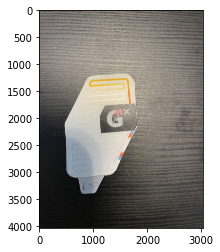

In [80]:
for i in range(len(test_data.filenames)):
  show_prediction1(test_data.filenames[i])

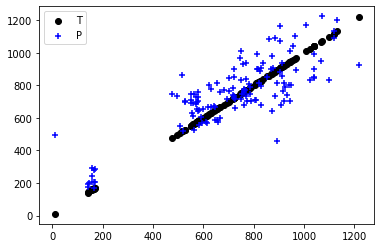

In [81]:
# Plot outputs
plt.scatter(actualval, actualval,  color='black')
plt.scatter(actualval, predicted, color='blue',marker='+')
plt.legend("TP")

plt.show()

Comparing sodium level of same patch in diff lighting

1454

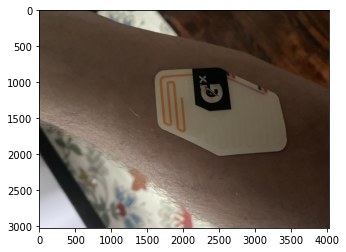

In [98]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/unedited.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred
#actual = int(p.search(fname).group(1))

1457

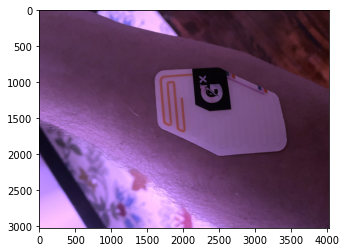

In [100]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/edited.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred
#actual = int(p.search(fname).group(1))

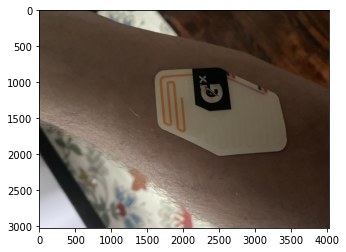

In [82]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/unedited.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
#actual = int(p.search(fname).group(1))

In [83]:
pred

757

675

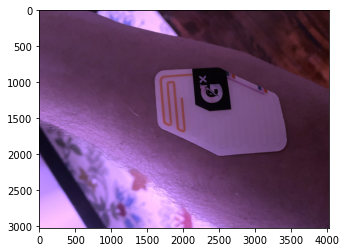

In [84]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/edited.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
pred

883

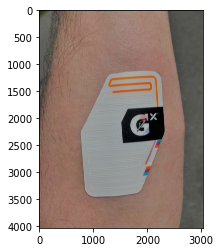

In [85]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/24.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
pred

1205

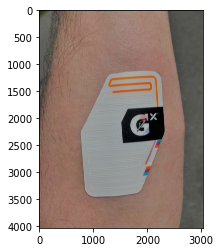

In [86]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/24.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred

1133

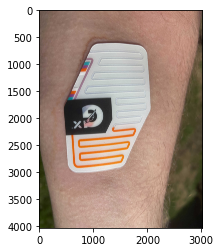

In [87]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/36.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
pred

1519

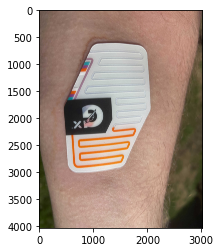

In [88]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/36.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred

1041

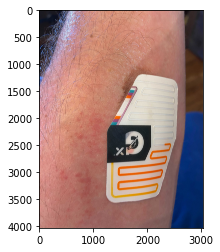

In [90]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/35.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
pred

1924

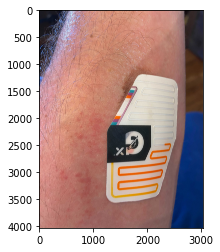

In [91]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/35.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred

1076

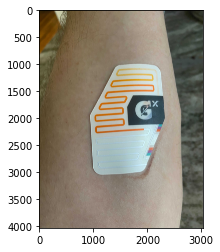

In [92]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/33.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
pred

1362

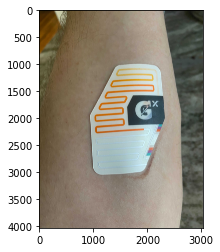

In [93]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/33.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred

871

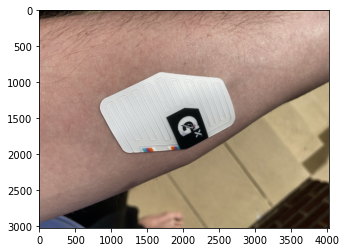

In [94]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/empty.jpg'
pred = round(predictor1.predict_filename(fname)[0])
vis.show_image(fname)
pred

1637

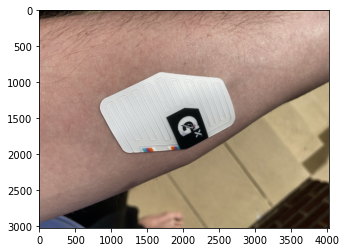

In [95]:
fname = '/content/drive/MyDrive/Colab Notebooks/42-696_Sweat Response Project codes/empty.jpg'
pred = round(predictor.predict_filename(fname)[0])
vis.show_image(fname)
pred